In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_sales_data.csv')

In [3]:
df.head(5)

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25-05-2024,06:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04-05-2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07-05-2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23-05-2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15-03-2024,03:08:25


In [4]:
# Total Rows and Columns
print("Total Rows :", df.shape[0])
print("Total Columns :", df.shape[1])

Total Rows : 100000
Total Columns : 11


In [5]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), 
                      df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature, df Type, Null, Null (%), Unique, Unique Sample' .split(","))
desc_df

,Feature,df Type,Null,Null (%),Unique,Unique Sample
0,Order ID,object,0,0.0,100000,"[261e3740-c0e9-42b1-bf87-881ac950fa3a, 0b332b3..."
1,Product Name,object,0,0.0,971,"[audience, such, read, skill, cold]"
2,Category,object,0,0.0,5,"[Home & Garden, Clothing, Electronics, Books, ..."
3,Price,float64,0,0.0,60397,"[766.85, 331.42, 708.1, 774.09, 397.22]"
4,Quantity,int64,0,0.0,10,"[4, 10, 2, 1, 8]"
5,Total Sales,float64,0,0.0,87149,"[3067.4, 1325.68, 7081.0, 1548.18, 397.22]"
6,Customer ID,object,0,0.0,100000,"[81af1248-afff-46ee-a091-81cf33d0d957, f3f3f4a..."
7,Customer Age,int64,0,0.0,53,"[39, 21, 27, 51, 45]"
8,Customer Gender,object,0,0.0,2,"[Male, Female]"
9,Purchase Date,object,0,0.0,156,"[25-05-2024, 04-05-2024, 07-05-2024, 23-05-202..."


In [6]:
# Statistics about the data set
df.describe()

,Price,Quantity,Total Sales,Customer Age
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,550.550363,5.493160,3027.926702,44.01757
std,260.558267,2.882013,2274.140853,15.30850
min,100.050000,1.000000,100.050000,18.00000
25%,323.967500,3.000000,1153.515000,31.00000
50%,551.100000,5.000000,2433.885000,44.00000
75%,777.125000,8.000000,4443.337500,57.00000
max,999.990000,10.000000,9999.400000,70.00000


In [7]:
# Check missing values
df.isnull().sum()

Order ID           0
Product Name       0
Category           0
Price              0
Quantity           0
Total Sales        0
Customer ID        0
Customer Age       0
Customer Gender    0
Purchase Date      0
Purchase Time      0
dtype: int64

In [8]:
# Check duplicated value
df.duplicated().sum()

0

In [9]:
# Outlier Detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | df[numerical_cols] > (Q3 + 1.5 * IQR)).sum()
outliers

Price           0
Quantity        0
Total Sales     0
Customer Age    0
dtype: int64

In [10]:
# Drop unnecessary columns
df.drop(['Order ID', 'Product Name', 'Customer ID', 'Purchase Time'], axis=1, inplace=True)

In [11]:
df.rename(columns = {"Total Sales": "Sales", "Customer Age": "Age", "Customer Gender": "Gender",
                    "Purchase Date": "Date"}, inplace=True)

In [12]:
df.head(5)

,Category,Price,Quantity,Sales,Age,Gender,Date
0,Home & Garden,766.85,4,3067.40,39,Male,25-05-2024
1,Clothing,331.42,4,1325.68,21,Male,04-05-2024
2,Clothing,708.10,10,7081.00,27,Female,07-05-2024
3,Electronics,774.09,2,1548.18,51,Female,23-05-2024
4,Electronics,397.22,1,397.22,45,Female,15-03-2024


In [13]:
# Total Rows and Columns
print("Total Rows :", df.shape[0])
print("Total Columns :", df.shape[1])

Total Rows : 100000
Total Columns : 7


In [14]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), 
                      df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature, df Type, Null, Null (%), Unique, Unique Sample' .split(","))
desc_df

,Feature,df Type,Null,Null (%),Unique,Unique Sample
0,Category,object,0,0.0,5,"[Home & Garden, Clothing, Electronics, Books, ..."
1,Price,float64,0,0.0,60397,"[766.85, 331.42, 708.1, 774.09, 397.22]"
2,Quantity,int64,0,0.0,10,"[4, 10, 2, 1, 8]"
3,Sales,float64,0,0.0,87149,"[3067.4, 1325.68, 7081.0, 1548.18, 397.22]"
4,Age,int64,0,0.0,53,"[39, 21, 27, 51, 45]"
5,Gender,object,0,0.0,2,"[Male, Female]"
6,Date,object,0,0.0,156,"[25-05-2024, 04-05-2024, 07-05-2024, 23-05-202..."


In [15]:
df['Category'].unique()

array(['Home & Garden', 'Clothing', 'Electronics', 'Books', 'Toys'],
      dtype=object)

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
# Total Sales

In [18]:
total_sales = df['Sales'].sum()
print(f'Total Sales: {total_sales:.2f}')

Total Sales: 302792670.18


In [19]:
# Sales by Category

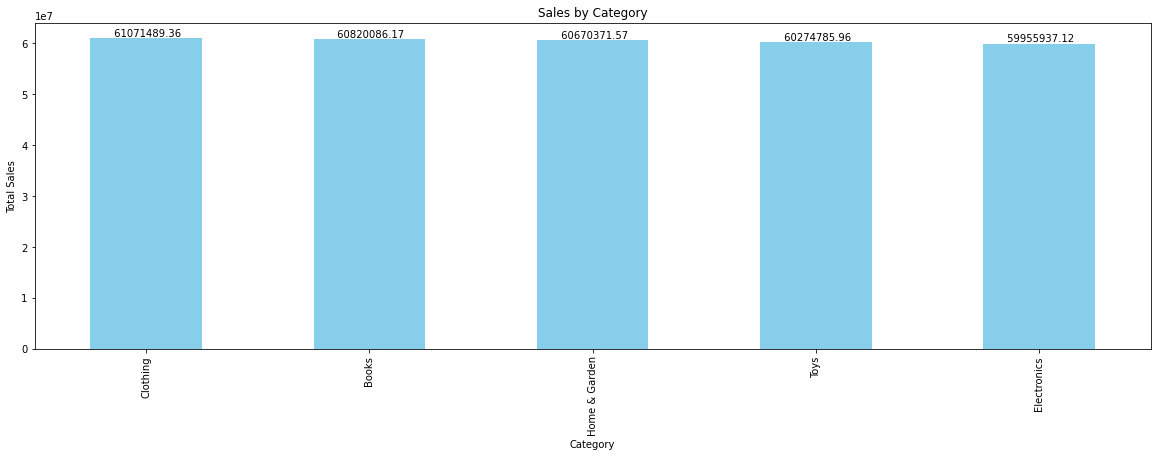

In [20]:
plt.figure(figsize=(20, 6))
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

for index, value in enumerate(sales_by_category):
    plt.text(index, value, f'{value: .2f}', ha='center', va='bottom')
    
plt.show()

In [21]:
# Category with Highest Sales: Clothing, and Category with Lowest Sales: Electronics.

In [22]:
sales_by_category

Category
Clothing         61071489.36
Books            60820086.17
Home & Garden    60670371.57
Toys             60274785.96
Electronics      59955937.12
Name: Sales, dtype: float64

In [23]:
# Customer Segmentation

In [24]:
# Categorizing Customers by Age
age_ranges = [0, 20, 40, np.inf]
age_labels = ['0-20', '21-40', '40+']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_ranges, labels=age_labels)

In [25]:
df['Age Group'].value_counts()

40+      56758
21-40    37671
0-20      5571
Name: Age Group, dtype: int64

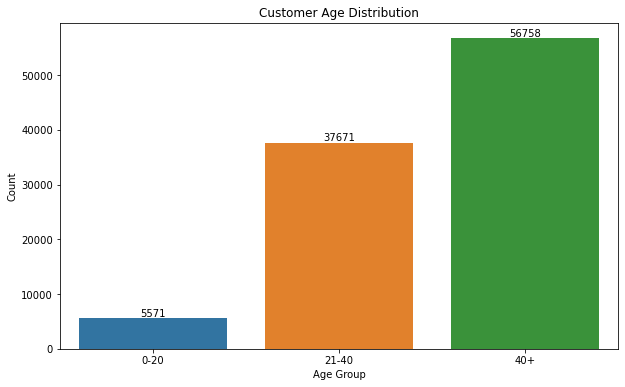

In [26]:
# Visualize customer age distribution
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='Age Group', order=age_labels)
for bars in ax.containers:
    ax.bar_label(bars)
    

plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [27]:
# Age Group with the most customers: 40+ (56,758), and Age Group with the fewest customers: 0-20 (5,571).

In [28]:
# Sales by Customer Age Group

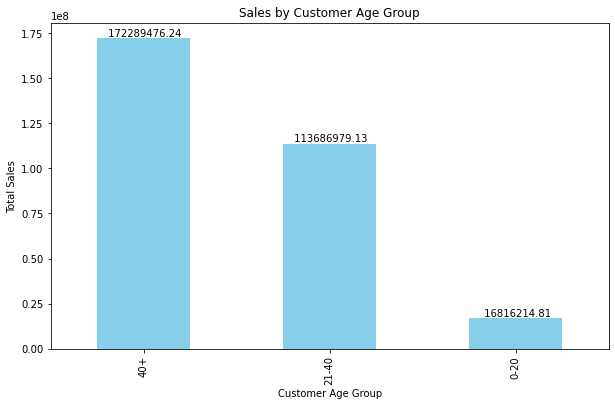

In [29]:
plt.figure(figsize=(10, 6))
age_group_sales = df.groupby('Age Group')['Sales'].sum().sort_values(ascending=False)
age_group_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Total Sales')

for index, value in enumerate(age_group_sales):
    plt.text(index, value, f'{value: .2f}', ha='center', va='bottom')
    
plt.show()

In [30]:
# Age Group with the Highest Sales: 40+ Age Group, and Age Group with the Lowest Sales: 0-20 Age Group.

In [31]:
# Segmentation Based on Sales

In [32]:
low_value_threshold = 2000
high_value_threshold = 4000

def categorize_customers(sales):
    if sales <= low_value_threshold:
        return "Low-Value"
    elif sales <= high_value_threshold:
        return "Mid-Value"
    else:
        return "High-Value"

df['Customer Segment'] = df['Sales'].apply(categorize_customers)

segment_counts = df['Customer Segment'].value_counts()
segment_counts

Low-Value     43174
High-Value    29076
Mid-Value     27750
Name: Customer Segment, dtype: int64

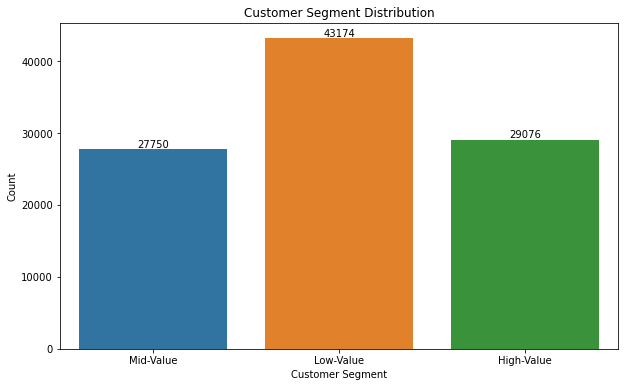

In [33]:
# Visualize customer segment distribution
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='Customer Segment')
for bars in ax.containers:
    ax.bar_label(bars)
    

plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

In [34]:
# Customer Segment with the most customers: Low-Value (43,174), 
# and Customer Segment with the fewest customers: Mid-Value (27,750).

In [35]:
# Sales by Customer Segment

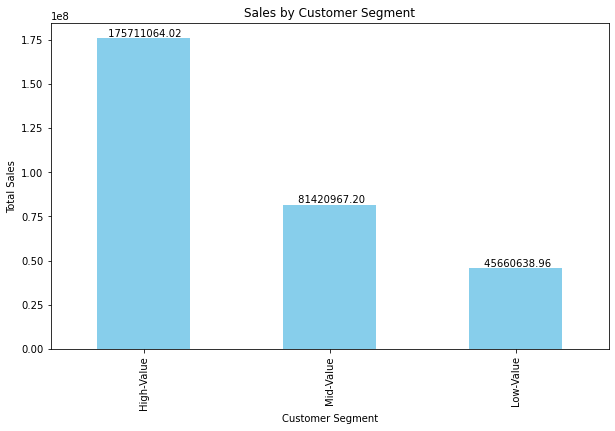

In [36]:
plt.figure(figsize=(10, 6))
sales_by_customer_segment = df.groupby('Customer Segment')['Sales'].sum().sort_values(ascending=False)
sales_by_customer_segment.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')

for index, value in enumerate(sales_by_customer_segment):
    plt.text(index, value, f'{value: .2f}', ha='center', va='bottom')
    
plt.show()

In [37]:
# Customer Segment with the Highest Sales: High-Value, and Customer Segment with the Lowest Sales: Low-Value.

In [38]:
gender_count = df['Gender'].value_counts()
gender_count

Female    50090
Male      49910
Name: Gender, dtype: int64

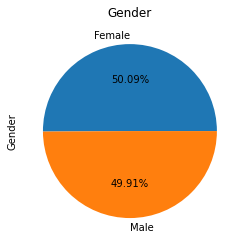

In [39]:
gender_count.plot(kind='pie', autopct='%1.2f%%')
plt.title('Gender')
plt.show()

In [40]:
# There are more female customers (50090, 50.09%) than male customers (49910, 49.91%).

In [41]:
# Sales by Gender

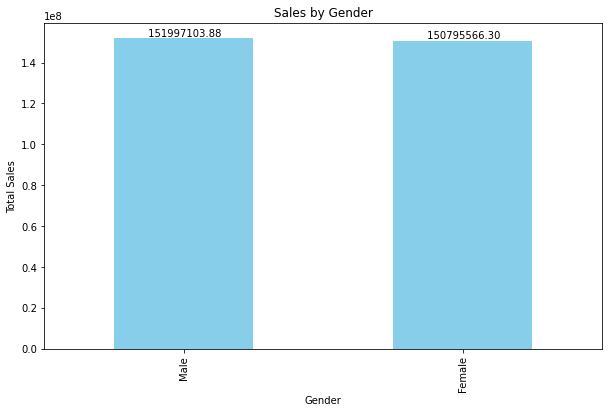

In [42]:
plt.figure(figsize=(10, 6))
sales_by_gender = df.groupby('Gender')['Sales'].sum().sort_values(ascending=False)
sales_by_gender.plot(kind='bar', color='skyblue')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')

for index, value in enumerate(sales_by_gender):
    plt.text(index, value, f'{value: .2f}', ha='center', va='bottom')
    
plt.show()

In [43]:
# Male customers contribute more to total sales than female customers. 

In [44]:
df['Month'] = pd.to_datetime(df["Date"]).dt.month
df['Year'] = pd.to_datetime(df["Date"]).dt.year
df.head(5)

,Category,Price,Quantity,Sales,Age,Gender,Date,Age Group,Customer Segment,Month,Year
0,Home & Garden,766.85,4,3067.40,39,Male,25-05-2024,21-40,Mid-Value,5,2024
1,Clothing,331.42,4,1325.68,21,Male,04-05-2024,21-40,Low-Value,4,2024
2,Clothing,708.10,10,7081.00,27,Female,07-05-2024,21-40,High-Value,7,2024
3,Electronics,774.09,2,1548.18,51,Female,23-05-2024,40+,Low-Value,5,2024
4,Electronics,397.22,1,397.22,45,Female,15-03-2024,40+,Low-Value,3,2024


In [45]:
df['Month'].unique()

array([ 5,  4,  7,  3,  2, 12,  1,  8, 11,  6,  9, 10], dtype=int64)

In [46]:
df['Year'].unique()

array([2024], dtype=int64)

In [47]:
# Monthly Sales Trend

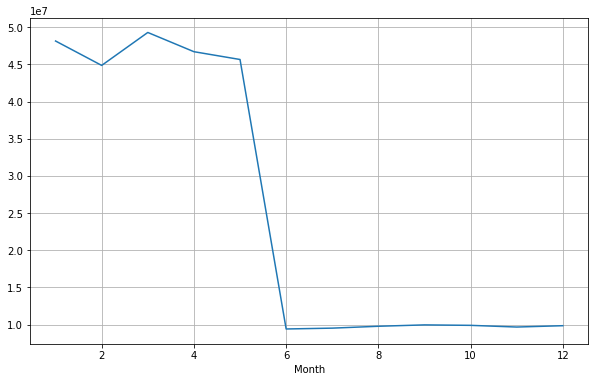

In [48]:
plt.figure(figsize=(10, 6))
sales_by_month = df.groupby('Month').sum()['Sales']
sales_by_month.plot()
plt.grid()

In [49]:
# Month with the highest sales: 3rd Month (March), and Month with the lowest sales: 6th Month (June).

In [50]:
sales_by_month

Month
1     48133245.08
2     44852816.95
3     49281535.55
4     46696869.64
5     45648387.68
6      9423579.47
7      9536042.86
8      9788315.74
9      9972666.21
10     9911071.34
11     9684154.86
12     9863984.80
Name: Sales, dtype: float64

In [51]:
# Insights:
# Category with Highest Sales: Clothing, and Category with Lowest Sales: Electronics.
# Age Group with the most customers: 40+ (56,758), and Age Group with the fewest customers: 0-20 (5,571).
# Age Group with the Highest Sales: 40+ Age Group, and Age Group with the Lowest Sales: 0-20 Age Group.
# Customer Segment with the most customers: Low-Value (43,174), 
# and Customer Segment with the fewest customers: Mid-Value (27,750).
# Customer Segment with the Highest Sales: High-Value, and Customer Segment with the Lowest Sales: Low-Value.
# There are more female customers (50090, 50.09%) than male customers (49910, 49.91%).
# Male customers contribute more to total sales than female customers. 
# Month with the highest sales: 3rd Month (March), and Month with the lowest sales: 6th Month (June).

In [52]:
# Conclusion:

# High-Value customers are responsible for the highest sales, and the 40+ age group has both the most customers and the highest 
# -sales. Concentrating marketing and product development on this group is the most efficient path to revenue growth.

# Clothing has the highest overall sales, so investing in promotions within this category will likely yield the best return.

#  While female customers are the majority, they contribute less to total sales than male customers. Offer promotions 
# -on high-cost items or bundles that provide greater value for customers.

# The "High-Value" segment contributes the most sales, increasing loyalty programs and personalized outreach to this group 
# -will likely drive repeat business and increase their overall lifetime value. 

# Sales peak in March. Focusing promotional efforts during these times will take advantage of existing positive trends 
# -to maximize sales.